In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BMonthBegin
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [7]:
sector_etf = dict({
    'Consumer Discretionary' : 'XLY',
    'Consumer Staples' : 'XLP',
    'Energy' : 'XLE',
    'Financials' : 'XLF' ,
    'Health Care' : 'XLV',
    'Industrials' : 'XLI',
    'Materials' : 'XLB',
    'Real Estate' : 'XLRE',
    'Information Technology' : 'XLK',
    'Communication Services' : 'XLC',
    'Utilities' : 'XLU',
    'S&P' : 'SPY'
})
etfs = yf.download(list(sector_etf.values()))

[*********************100%%**********************]  12 of 12 completed


In [8]:
etf_returns = etfs['Adj Close'].resample('M').last().pct_change().loc['2008':]
etf_returns.to_csv('etf_returns.csv')

In [9]:
etf_returns = pd.read_csv('etf_returns.csv')
etf_returns['Date'] = pd.to_datetime(etf_returns['Date'])
etf_returns = etf_returns.set_index('Date')
etf_returns.head()

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
2008-01-31,-0.060461,-0.041967,NaN,-0.122873,0.007259,-0.055158,-0.127907,-0.055556,NaN,-0.073470,-0.045596,-0.003670
2008-02-29,-0.025843,0.023029,NaN,0.092673,-0.113590,-0.020271,-0.047312,-0.002574,NaN,-0.041050,-0.026707,-0.038674
2008-03-31,-0.008942,-0.014059,NaN,-0.023363,-0.029401,0.036307,0.011561,0.032399,NaN,0.016053,-0.045441,-0.017865
2008-04-30,0.047662,0.053274,NaN,0.103835,0.069964,0.029411,0.062500,-0.007537,NaN,0.051133,0.009945,0.023763
2008-05-31,0.015117,0.051997,NaN,0.051988,-0.069523,0.008831,0.065126,0.030380,NaN,0.035857,0.019059,0.027345


# LGB Base

In [10]:
lgb_base = pd.read_csv('lgb_base.csv')
lgb_base['Date'] = pd.to_datetime(lgb_base['Date'])
lgb_base = lgb_base.set_index('Date')

In [11]:
lgb_df = pd.merge(lgb_base, etf_returns, how = 'inner', left_index=True, right_index=True)
for i in range(1, 5):
    lgb_df[f'Return_{i}'] = lgb_df.apply(lambda row: row[row[f'Top{i}']] if pd.notna(row[f'Top{i}']) and row[f'Top{i}'] in lgb_df.columns else None, axis=1)

<Axes: xlabel='Date'>

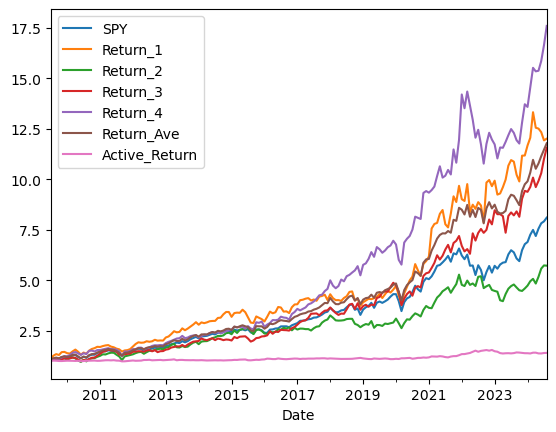

In [12]:
lgb_base_return = lgb_df[['SPY','Return_1','Return_2','Return_3','Return_4']]
lgb_base_return['Return_Ave'] = lgb_base_return[['Return_1','Return_2','Return_3','Return_4']].mean(axis=1)
lgb_base_return['Active_Return']= lgb_base_return['Return_Ave'] - lgb_base_return['SPY']
(lgb_base_return+1).cumprod().plot()

# LGB E&B

In [13]:
lgb_eb = pd.read_csv('lgb_EB.csv')
lgb_eb['Date'] = pd.to_datetime(lgb_eb['Date'])
lgb_eb = lgb_eb.set_index('Date')

In [14]:
lgb_eb_df = pd.merge(lgb_eb, etf_returns, how = 'inner', left_index=True, right_index=True)
for i in range(1, 5):
    lgb_eb_df[f'Return_{i}'] = lgb_eb_df.apply(lambda row: row[row[f'Top{i}']] if pd.notna(row[f'Top{i}']) and row[f'Top{i}'] in lgb_eb_df.columns else None, axis=1)

lgb_eb_df

,Top1,Top2,Top3,Top4,Top-4 Accuracy,SPY,XLB,XLC,XLE,XLF,...,XLK,XLP,XLRE,XLU,XLV,XLY,Return_1,Return_2,Return_3,Return_4
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-31,XLE,XLB,XLK,XLI,0.50,0.074605,0.128682,NaN,0.053486,0.088702,...,0.081823,0.066551,NaN,0.037648,0.059293,0.094887,0.053486,0.128682,0.081823,0.087431
2009-08-31,XLK,XLB,XLI,XLE,0.25,0.036939,0.023695,NaN,0.010865,0.129900,...,0.016244,0.012235,NaN,0.010021,0.026910,0.035220,0.016244,0.023695,0.047739,0.010865
2009-09-30,XLE,XLV,XLB,XLK,0.50,0.035457,0.042217,NaN,0.058424,0.019477,...,0.046323,0.033110,NaN,0.013780,0.006152,0.053488,0.058424,0.006152,0.042217,0.046323
2009-10-31,XLV,XLE,XLU,XLP,0.75,-0.019225,-0.051713,NaN,0.024666,-0.059571,...,-0.012458,0.014532,NaN,-0.032050,-0.020928,-0.023662,-0.020928,0.024666,-0.032050,0.014532
2009-11-30,XLP,XLE,XLU,XLY,0.25,0.061607,0.107703,NaN,0.028416,0.043417,...,0.055313,0.036779,NaN,0.048257,0.092982,0.067114,0.036779,0.028416,0.048257,0.067114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,XLB,XLF,XLE,XLRE,0.25,-0.040320,-0.045861,-0.046534,-0.009427,-0.041785,...,-0.057618,-0.011263,-0.084493,0.016603,-0.050091,-0.044973,-0.045861,-0.041785,-0.009427,-0.084493
2024-05-31,XLC,XLE,XLK,XLY,0.50,0.050580,0.032720,0.069355,-0.003422,0.031715,...,0.070770,0.024371,0.051395,0.089601,0.024015,0.001993,0.069355,-0.003422,0.070770,0.001993
2024-06-30,XLK,XLC,XLY,XLI,0.75,0.035280,-0.030584,0.031546,-0.014142,-0.008819,...,0.078354,-0.002351,0.019717,-0.055426,0.018240,0.038770,0.078354,0.031546,0.038770,-0.009889


In [15]:
lgb_eb_return = lgb_eb_df[['SPY','Return_1','Return_2','Return_3','Return_4']]
lgb_eb_return['Return_Ave'] = lgb_eb_return[['Return_1','Return_2','Return_3','Return_4']].mean(axis=1)
lgb_eb_return['Active_Return']= lgb_eb_return['Return_Ave'] - lgb_eb_return['SPY']

<Axes: xlabel='Date'>

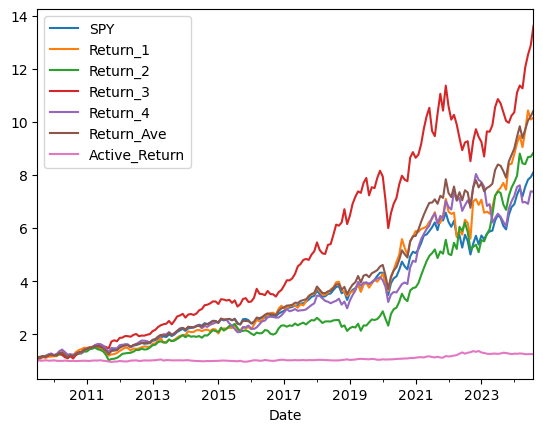

In [16]:
(lgb_eb_return+1).cumprod().plot()

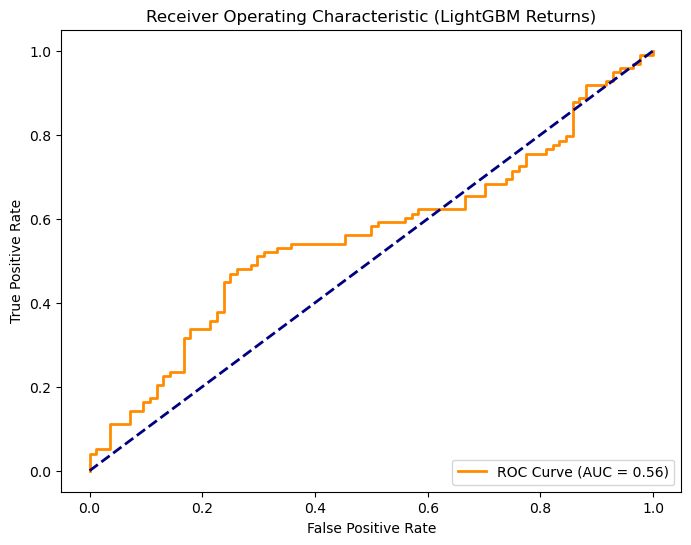

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Add binary labels for classification
lgb_eb_return['Positive_Active_Return'] = (lgb_eb_return['Active_Return'] > 0).astype(int)

# Define y_true and y_scores
y_true = lgb_eb_return['Positive_Active_Return']  # Binary labels (1 for positive, 0 for negative)
y_scores = lgb_eb_return['Return_Ave']  # Use the average return as the prediction score

# Remove any rows with missing values
y_true = y_true[~y_scores.isna()]
y_scores = y_scores[~y_scores.isna()]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LightGBM Returns)')
plt.legend(loc="lower right")
plt.show()


# XGB Base

In [18]:
xgb_base = pd.read_csv('xbg_base.csv')
xgb_base['Date'] = pd.to_datetime(xgb_base['Date'])
xgb_base = xgb_base.set_index('Date')

In [19]:
xgb_df = pd.merge(xgb_base, etf_returns, how = 'inner', left_index=True, right_index=True)
for i in range(1, 5):
    xgb_df[f'Return_{i}'] = xgb_df.apply(lambda row: row[row[f'Top{i}']] if pd.notna(row[f'Top{i}']) and row[f'Top{i}'] in xgb_df.columns else None, axis=1)
xgb_df = xgb_df.loc['2009-02-28':]

<Axes: xlabel='Date'>

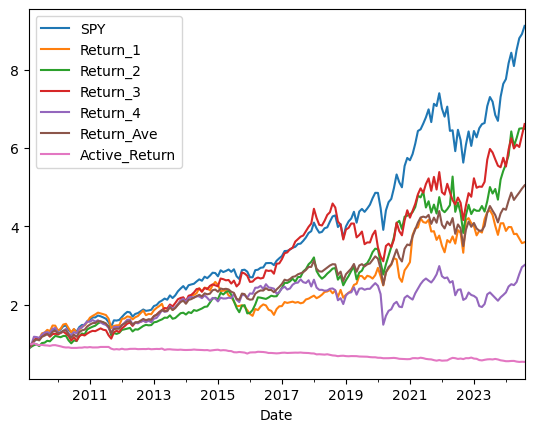

In [21]:
xgb_base_return = xgb_df[['SPY','Return_1','Return_2','Return_3','Return_4']]
xgb_base_return['Return_Ave'] = xgb_base_return[['Return_1','Return_2','Return_3','Return_4']].mean(axis=1)
xgb_base_return['Active_Return']= xgb_base_return['Return_Ave'] - xgb_base_return['SPY']
(xgb_base_return+1).cumprod().plot()

# XGB E&B

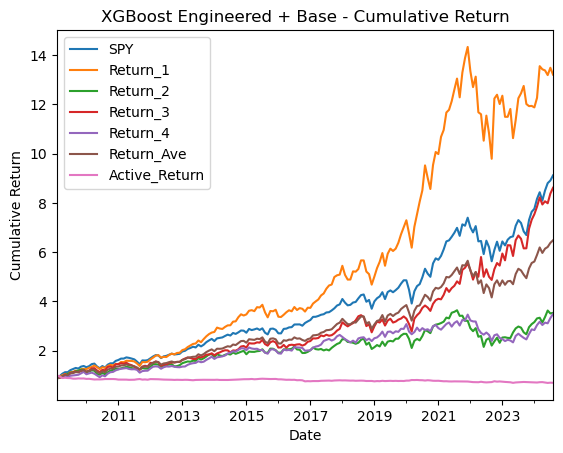

In [22]:
xgb_eb = pd.read_csv('xbg_EB.csv')  # Reading the engineered + base file
xgb_eb['Date'] = pd.to_datetime(xgb_eb['Date'])  # Convert Date column to datetime
xgb_eb = xgb_eb.set_index('Date')  # Set Date column as index

# Merge with ETF returns data
xgb_eb_df = pd.merge(xgb_eb, etf_returns, how='inner', left_index=True, right_index=True)

# Extract returns for the top ETFs
for i in range(1, 5):
    xgb_eb_df[f'Return_{i}'] = xgb_eb_df.apply(
        lambda row: row[row[f'Top{i}']] if pd.notna(row[f'Top{i}']) and row[f'Top{i}'] in xgb_eb_df.columns else None,
        axis=1
    )

xgb_eb_df = xgb_eb_df.loc['2009-02-28':]  # Filter data starting from February 2009

# Calculate average return and active return
xgb_eb_return = xgb_eb_df[['SPY', 'Return_1', 'Return_2', 'Return_3', 'Return_4']]
xgb_eb_return['Return_Ave'] = xgb_eb_return[['Return_1', 'Return_2', 'Return_3', 'Return_4']].mean(axis=1)
xgb_eb_return['Active_Return'] = xgb_eb_return['Return_Ave'] - xgb_eb_return['SPY']

# Plot cumulative returns
(xgb_eb_return + 1).cumprod().plot()
plt.title("XGBoost Engineered + Base - Cumulative Return")
plt.ylabel("Cumulative Return")
plt.show()


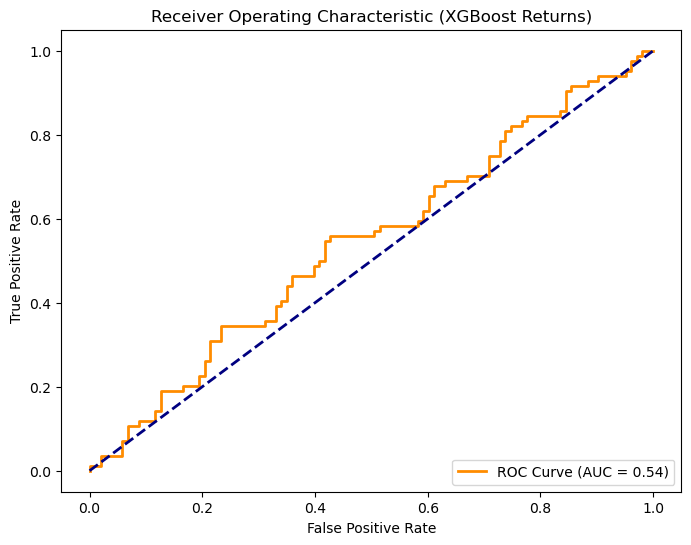

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Add binary labels for classification
xgb_eb_return['Positive_Active_Return'] = (xgb_eb_return['Active_Return'] > 0).astype(int)

# Define y_true and y_scores
y_true = xgb_eb_return['Positive_Active_Return']  # Binary labels (1 for positive, 0 for negative)
y_scores = xgb_eb_return['Return_Ave']  # Use the average return as the prediction score

# Remove any rows with missing values
y_true = y_true[~y_scores.isna()]
y_scores = y_scores[~y_scores.isna()]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost Returns)')
plt.legend(loc="lower right")
plt.show()


# Evalualtion Metrics

In [24]:
def sharpe_ratio(r):
    return np.sqrt(12) * r.mean() / r.std()

def total_return(r):
    return (1 + r).prod() - 1

def annual_volatility(r):
    return np.sqrt(12) * r.std()
    
def drawdown(r):
    value = (1 + r).cumprod()
    return value / value.cummax() - 1

def max_drawdown(r):
    return drawdown(r).min()

def stability(r):
    df = pd.DataFrame({
        'cumlogr': np.log(1 + r).cumsum(),
        'time': np.arange(r.shape[0])
    })
    # df.corr().iloc[1,0]**2
    from statsmodels.formula.api import ols
    mod = ols(formula='cumlogr ~ 1 + time', data=df).fit()

    return mod.rsquared

def sortino_ratio(r):
    negr = r.loc[r < 0]
    return np.sqrt(12) * r.mean() / negr.std()

def plot_cumulative_return(r):
    (1 + r).cumprod().plot()
    plt.title('Cumulative Return on $1 Investment')
    plt.ylabel('Cumulative Return ($)')
    plt.axhline(1, color='k', linestyle='--')
    plt.show()
    return None

def tear_sheet(r, column='', plots=True):
    dic = {
        'Total Return': total_return(r),
        'Average Return': r.mean(),
        'Annual Volatility': annual_volatility(r),
        'Sharpe Ratio': sharpe_ratio(r),
        'Max Drawdown': max_drawdown(r),
        'Sortino Ratio': sortino_ratio(r),
    }
    df = pd.DataFrame(data=dic.values(), columns = [column], index=dic.keys())
    return df

In [25]:
xgb_base = pd.read_csv('xbg_base.csv')
xgb_base['Date'] = pd.to_datetime(xgb_base['Date'])
xgb_base = xgb_base.set_index('Date')

In [26]:
xgb_base

,Unnamed: 0,Top1,Top2,Top3,Top4,Top-4 Accuracy
Date,,,,,,
2008-07-31,0,XLK,XLU,XLI,XLY,0.25
2008-08-31,1,XLE,XLP,XLU,XLV,0.50
2008-09-30,2,XLK,XLV,XLU,XLF,0.50
2008-10-31,3,XLK,XLV,XLE,XLP,0.75
2008-11-30,4,XLY,XLP,XLF,XLU,0.50
...,...,...,...,...,...,...
2024-04-30,189,XLY,XLK,XLF,XLE,0.25
2024-05-31,190,XLY,XLB,XLI,XLF,0.00
2024-06-30,191,XLB,XLY,XLI,XLK,0.50


In [27]:
lgb_base.index

DatetimeIndex(['2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31',
               '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28',
               '2010-03-31', '2010-04-30',
               ...
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31'],
              dtype='datetime64[ns]', name='Date', length=182, freq=None)

# Metrics Table

In [29]:
BT_1 = tear_sheet(lgb_base_return['Return_Ave'], 'lgb_base')
BT_2 = tear_sheet(lgb_eb_return['Return_Ave'], 'lgb_eb')
BT_3 = tear_sheet(xgb_base_return['Return_Ave'], 'xgb_base')
BT_4 = tear_sheet(xgb_eb_return['Return_Ave'], 'xgb_eb')
BT_5 = tear_sheet(lgb_base_return['SPY'], 'spy')
BT = pd.merge(BT_1, BT_2, left_index=True, right_index=True)
BT = pd.merge(BT, BT_3, left_index=True, right_index=True)
BT = pd.merge(BT, BT_4, left_index=True, right_index=True)
BT = pd.merge(BT, BT_5, left_index=True, right_index=True)
BT

,lgb_base,lgb_eb,xgb_base,xgb_eb,spy
Total Return,10.785680,9.423772,4.047240,5.478325,7.105873
Average Return,0.014461,0.013768,0.009697,0.010963,0.012446
Annual Volatility,0.140737,0.139601,0.155046,0.148881,0.145787
Sharpe Ratio,1.233006,1.183445,0.750522,0.883662,1.024423
Max Drawdown,-0.208969,-0.197535,-0.225778,-0.263557,-0.239272
Sortino Ratio,1.958223,1.752171,1.045268,1.275289,1.554915
